# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
    plot_confusion_matrix,
    precision_recall_curve,
)

import math

# Libraries for different ensemble classifiers and regressors
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)

from xgboost import XGBClassifier

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for Decision Tree prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(1)
data.sample(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.91000,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.98000,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.29210,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.80000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.19000,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.72610,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.39000,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.04000,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.02000,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.82570,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00000,NaN,NaN,NaN,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,NaN,NaN,NaN,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00000,NaN,NaN,NaN,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [5]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [7]:
# checking for null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

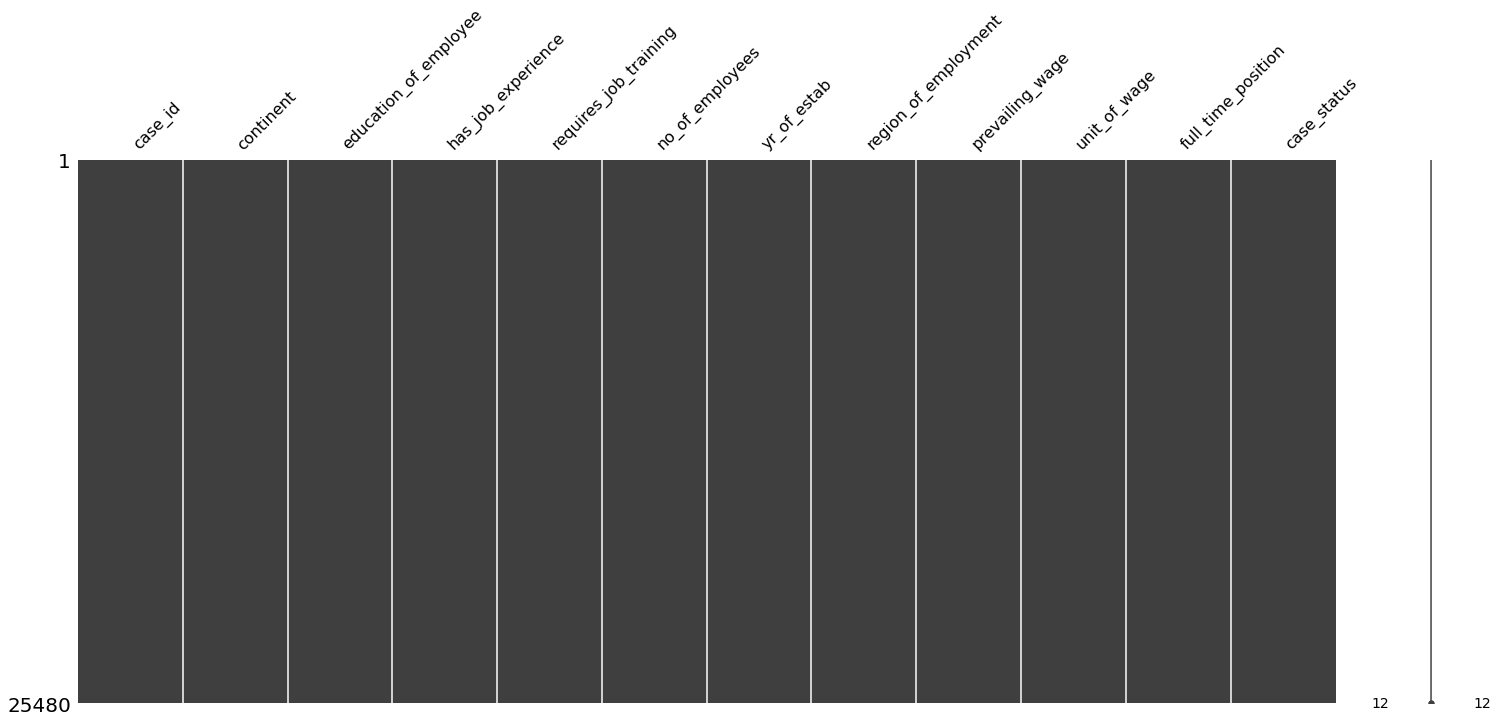

<IPython.core.display.Javascript object>

In [8]:
# another way to visualize if there are null values
import missingno

missingno.matrix(data)

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# grab all columns of type object into a list
cols = list(data.select_dtypes(include="object"))

# remove case_id from list because each row has a unique value here
cols.remove("case_id")

# output the count of each value in each object column
for col in cols:
    print(data.value_counts(col))
    print("")

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
dtype: int64

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
dtype: int64

has_job_experience
Y    14802
N    10678
dtype: int64

requires_job_training
N    22525
Y     2955
dtype: int64

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
dtype: int64

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
dtype: int64

full_time_position
Y    22773
N     2707
dtype: int64

case_status
Certified    17018
Denied        8462
dtype: int64



<IPython.core.display.Javascript object>

In [11]:
print(
    "The percentage of certified cases are",
    round(data["case_status"].value_counts()[0] / data.shape[0] * 100, 2),
    "%.",
)
print(
    "The percentage of denied cases are",
    round(data["case_status"].value_counts()[1] / data.shape[0] * 100, 2),
    "%.",
)

The percentage of certified cases are 66.79 %.
The percentage of denied cases are 33.21 %.


<IPython.core.display.Javascript object>

##### Observations:
- We should case_id column because it has a unique value for every row.
- All categorical variables (except case_id due to the reason above) all have a low number of unique values. They can be one-hot encoded at the end of our data cleaning process.
- It seems odd that no_of_employees has a minimum value of -26 because it's not possible to have a negative number of people. That will need further review - likely we will replace all rows that have this value as a negative number to be replaced with the median.
- yr_of_estab ranges from years 1800 to 2016. It may be valuable to convert this to a "years_since_2017" column to output how many years prior to 2017 that this company was established. This will make the numerical value of the column more proportional with each other.
- prevailing_wage isn't really an equal share across the data set, because it depends on the unit conversion in the unit_of_wage column. We need to combine the prevailing_wage and unit_of_wage columns into one column, probably called "yearly_wage". This would be the prevailing_wage value multiplied by the unit_of_wage multiplier (e.g. Year means multiply by 1, Month means multiply by 12)
- Looks like there are no null values in any column and none of the rows are duplicated.
- The data set contains about two-thirds certified cases and one-third denied cases.

We will do some Exploratory Data Analysis before data cleaning.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Creating a couple functions to help with data visualization.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

##### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


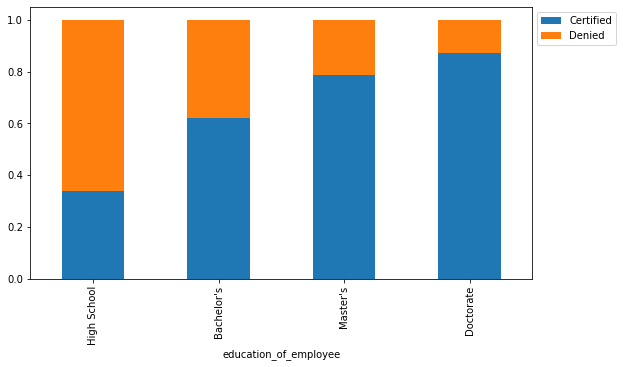

<IPython.core.display.Javascript object>

In [16]:
stacked_barplot(data, "education_of_employee", "case_status")

Education has a clear role in Visa certification. The higher level of education someone has, the more likely they will be certified.

##### 2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


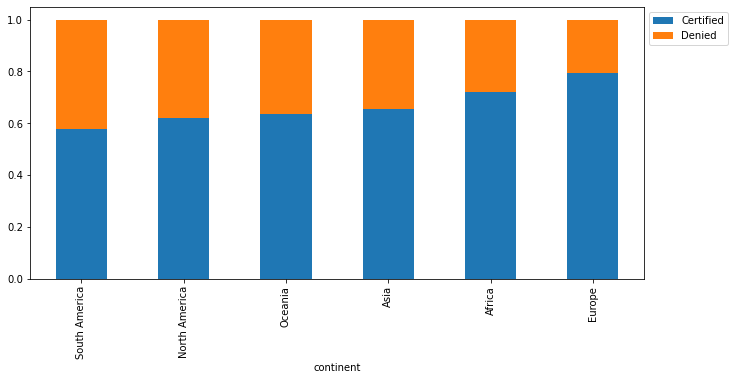

<IPython.core.display.Javascript object>

In [17]:
stacked_barplot(data, "continent", "case_status")

It appears that applicants from Europe have highest certification percentage, while South America has the lowest certification percentage. North America, Oceania, and Asia are slightly above South America. And Africa is slightly higher than the others.

However, it may be tough to solidify these conclusions because the data is skewed here. Over half of the data set is an application from Asia, and there is a good amount of applications from North America and Europe. South America, Africa, and Oceania don't have much data compared to the rest of the data set. Ideally we can scrape more data from these countries to make stronger conclusions.

##### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


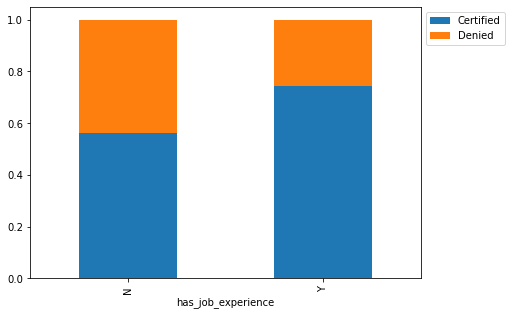

<IPython.core.display.Javascript object>

In [18]:
stacked_barplot(data, "has_job_experience", "case_status")

Those with job experience are more likely to be certified.

##### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


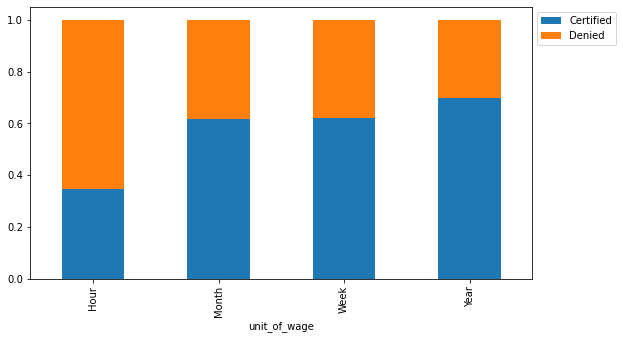

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(data, "unit_of_wage", "case_status")

Hour has a very low percentage of certification. Month, Week, and Year all have higher percentage of certification.

During initial sanity checks, I commented that the unit_of_wage column should be combined with the prevailing_wage column. However, given that this unit_of_wage column shows a clear factor in whether or not someone is certified, we should keep this information around. 

##### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

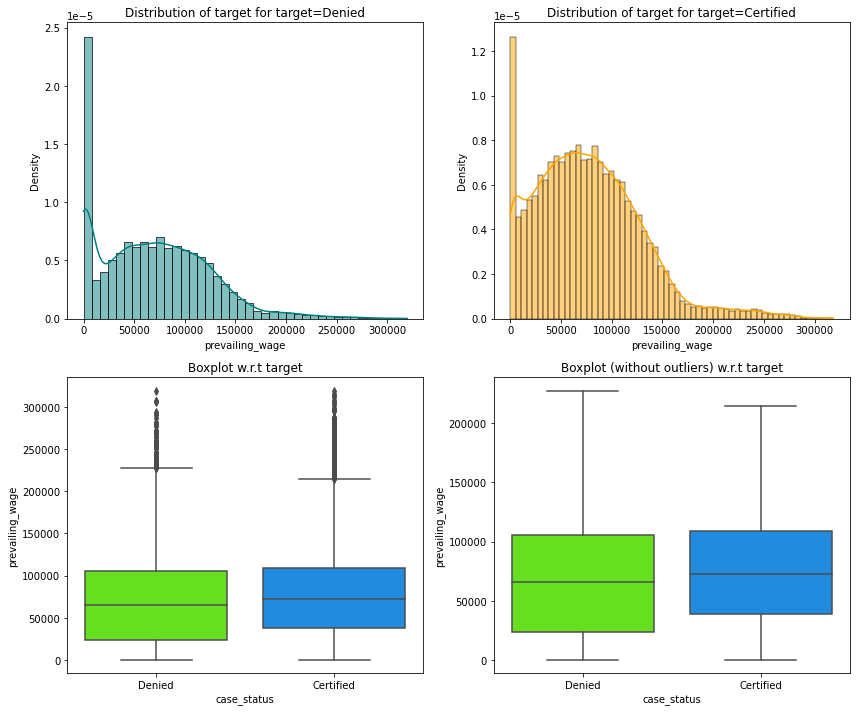

<IPython.core.display.Javascript object>

In [20]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Interestingly, prevailing_wage seems to have no major correlation to certification status.

Another observation here is that there is a lot of data at the very low wage range, and overall the prevailing_wage column is right skewed. Curious to see if combining this with the unit_of_wage column  will make this distribution more normal.

#### Additional Questions On My Mind

##### Does job training have an effect on whether or not an applicant is certified?

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


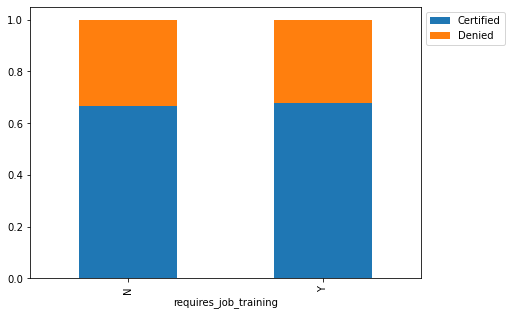

<IPython.core.display.Javascript object>

In [21]:
stacked_barplot(data, "requires_job_training", "case_status")

Interestingly, job training has no impact on whether or not someone was certified. This is likely because all jobs will require training to some extent, so it doesn't play a role in certification.

##### Do employees with lower education have higher likelihood to require job training?

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------


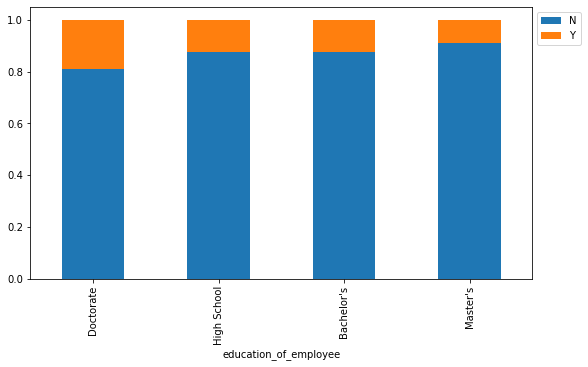

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(data, "education_of_employee", "requires_job_training")

Most jobs don't require job training. 

Interestingly, Doctorate has the highest likelihood of requiring job training. This is probably because Doctorates are so specialized in what they studied, that jobs require some training specific to their company to ensure the applicant can succeed.

##### Does year of company establishment have an effect on if someone is certified?

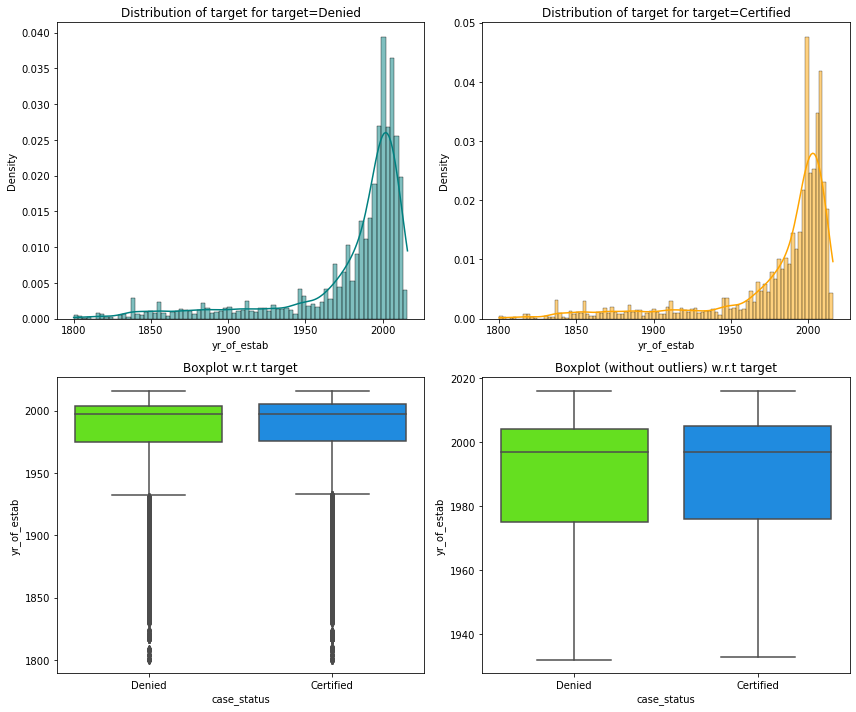

<IPython.core.display.Javascript object>

In [23]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

Year of establishment has no effect on if someone is certified. It makes sense that we care more about applicant experience than the company background for certification status.

This visualization also makes clear that most applicants are with new companies.

##### Does region of employment have an impact on whether or not the Visa is certified?

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


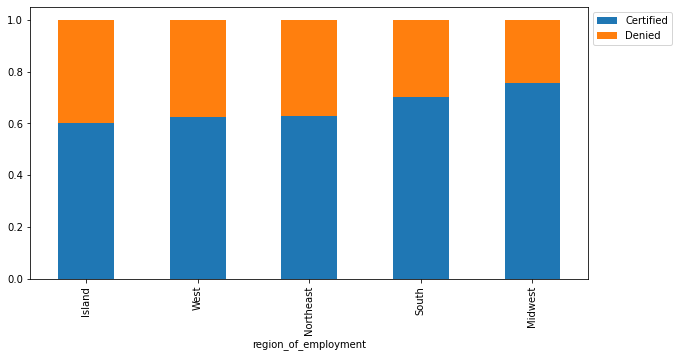

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(data, "region_of_employment", "case_status")

Island has the lowest percentage of case status certification, while Midwest has the highest. All regions range between about 60% to 75%.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

##### Missing Value Treatment

While there are no missing values in the data, it is odd that the minimum value for the no_of_employees columns is -26. This likely needs treatment. Let's explore this column more to figure out how to address it.

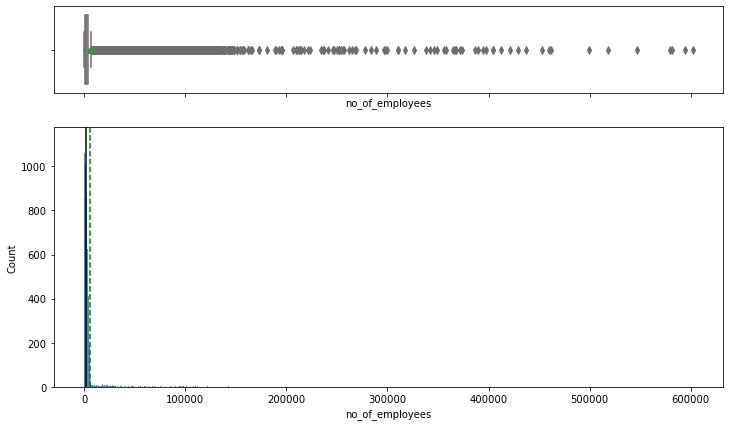

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "no_of_employees")

The outliers makes this plotting difficult. Let's remove the outliers.

<AxesSubplot:ylabel='no_of_employees'>

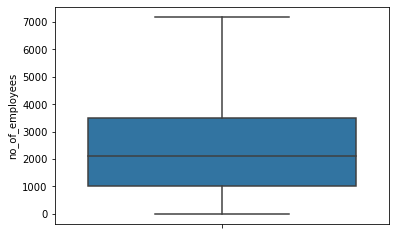

<IPython.core.display.Javascript object>

In [26]:
sns.boxplot(
    data=data, y="no_of_employees", showfliers=False,
)

To get a better picture of scope, let's view the data for rows with no_of_employees less than 0 with more granularity.

In [27]:
data[data["no_of_employees"] < 0].shape

(33, 12)

<IPython.core.display.Javascript object>

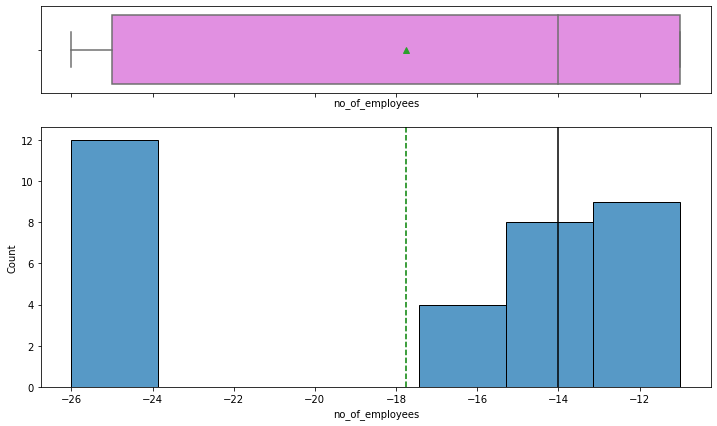

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data[data["no_of_employees"] < 0], "no_of_employees")

In [29]:
data[data["no_of_employees"] < 0].sort_values(by="no_of_employees")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
16883,EZYV16884,North America,Bachelor's,Y,N,-26,1968,Northeast,168.15580,Hour,Y,Denied
17983,EZYV17984,Asia,Bachelor's,N,N,-26,2004,South,84359.98000,Year,Y,Denied
14146,EZYV14147,Asia,Bachelor's,N,Y,-26,1954,West,81982.27000,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46000,Year,Y,Certified
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.32000,Year,Y,Denied
9872,EZYV9873,Europe,Master's,Y,N,-26,1996,South,37397.05000,Year,Y,Certified
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.61000,Year,Y,Certified
21255,EZYV21256,North America,High School,N,N,-25,1987,South,99405.47000,Year,N,Denied
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99000,Year,Y,Certified
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.95000,Year,Y,Certified


<IPython.core.display.Javascript object>

At a glance, there appears to be no correlation for why these rows have specific negative values. I will replace them with the median value for the column.

In [30]:
# calculate median from the positive values so that the negative values don't cause skew
employee_no_med = data[data["no_of_employees"] > 0]["no_of_employees"].median()

# replace median with only the columns where no_of_employees is negative
data["no_of_employees"] = np.where(
    (data.no_of_employees < 0), employee_no_med, data.no_of_employees
)


<IPython.core.display.Javascript object>

No other columns require missing value treatment or replacements, so we'll move on.

##### Feature Engineering

We observed that the prevailing_wage column isn't exactly fair to each row because the strength of the value depends on the unit_of_wage column. 

Let's first observe the prevailing_wage column a little more.

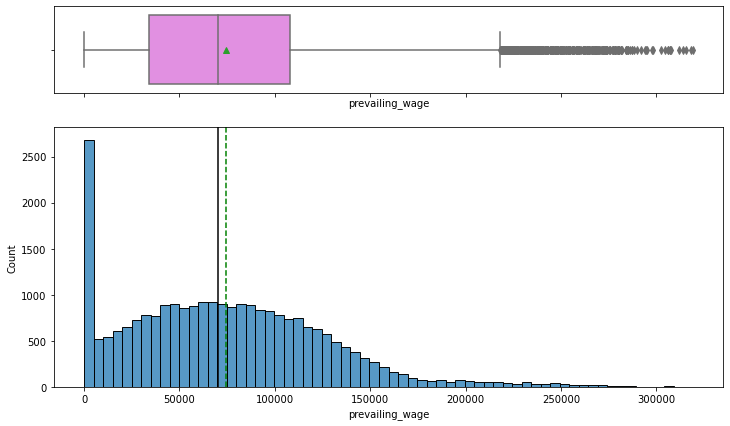

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "prevailing_wage")

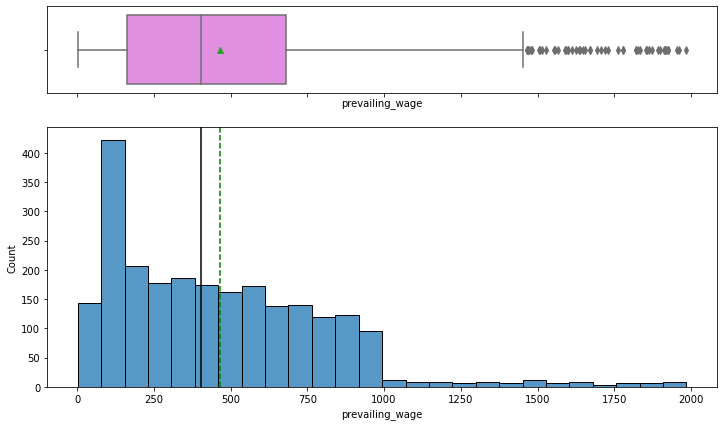

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data[data["prevailing_wage"] < 2000], "prevailing_wage")

Given that we're seeing a big jump in bins, we should make a new column called "yearly_wage" that levels the variable out. It will be the wage on a yearly basis. Basically the values in this will be:

If the unit_of_wage is Year, keep the same value as the prevailing_wage column.

If the unit_of_wage is Month, multiply the prevailing_wage column by 12 (12 months in a year).

If the unit_of_wage is Week, multiply the prevailing_wage column by 52 (52 weeks in a year).

If the unit_of_wage is Hour, multiple the prevailing_wage column by 2912 (52 weeks in a year * 7 days in a week * 8 hours of work in a day).

In [33]:
# make a dummy dataframe with just relevant columns so that we don't mess up the main dataframe
wage = data[["prevailing_wage", "unit_of_wage"]]

wage["unit_of_wage"] = np.where(wage.unit_of_wage == "Year", "1", wage.unit_of_wage)
wage["unit_of_wage"] = np.where(wage.unit_of_wage == "Month", "12", wage.unit_of_wage)
wage["unit_of_wage"] = np.where(wage.unit_of_wage == "Week", "52", wage.unit_of_wage)
wage["unit_of_wage"] = np.where(wage.unit_of_wage == "Hour", "2912", wage.unit_of_wage)

# Round the wage amount to 2 decimal points
# Multiple the prevailing_wage by the multiplier
wage["yearly_wage"] = round(
    wage["prevailing_wage"].astype(float) * wage["unit_of_wage"].astype(float), 2
)

data["yearly_wage"] = wage["yearly_wage"]

<IPython.core.display.Javascript object>

Let's explore what the newly converted wage column looks like

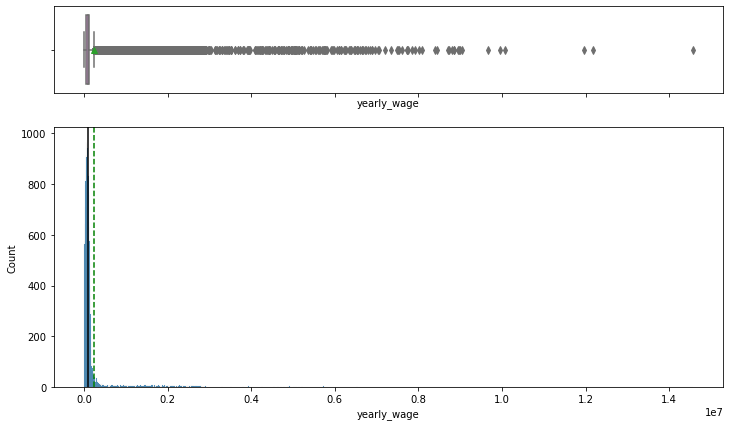

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "yearly_wage")

Overall, it doesn't make sense to use a yearly_wage column. It has many more outliers that causes values to be as high as $14,000,000. The prevailing_wage column has a max value of . This discrepancy is likely occuring from hourly workers - in reality, they will not work all hours of the year and it is difficult to predict the exact number of hours they did work.

We will not use the yearly_wage column, and keep the prevailing_wage column for our modeling.

In [35]:
data.drop("yearly_wage", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [36]:
# confirm drop was successful
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513.00000,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.00000,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444.00000,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.00000,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.00000,2005,South,149907.39000,Year,Y,Certified


<IPython.core.display.Javascript object>

The next column we should update is the yr_of_estab column. We will create a "years_since_2017" column to output how many years prior to 2017 that this company was established. This will make the numerical value of the column more proportional with each other.

In [37]:
data["years_since_2017"] = 2017 - data["yr_of_estab"]

<IPython.core.display.Javascript object>

In [38]:
data.drop("yr_of_estab", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [39]:
# confirm drop was successful
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_since_2017
0,EZYV01,Asia,High School,N,N,14513.00000,West,592.20290,Hour,Y,Denied,10
1,EZYV02,Asia,Master's,Y,N,2412.00000,Northeast,83425.65000,Year,Y,Certified,15
2,EZYV03,Asia,Bachelor's,N,Y,44444.00000,West,122996.86000,Year,Y,Denied,9
3,EZYV04,Asia,Bachelor's,N,N,98.00000,West,83434.03000,Year,Y,Denied,120
4,EZYV05,Africa,Master's,Y,N,1082.00000,South,149907.39000,Year,Y,Certified,12


<IPython.core.display.Javascript object>

Finally, we will drop the case_id column because that is a unique value for every row and will not provide valuable information for modeling.

In [40]:
data.drop("case_id", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [41]:
# confirm drop was successful
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_since_2017
0,Asia,High School,N,N,14513.00000,West,592.20290,Hour,Y,Denied,10
1,Asia,Master's,Y,N,2412.00000,Northeast,83425.65000,Year,Y,Certified,15
2,Asia,Bachelor's,N,Y,44444.00000,West,122996.86000,Year,Y,Denied,9
3,Asia,Bachelor's,N,N,98.00000,West,83434.03000,Year,Y,Denied,120
4,Africa,Master's,Y,N,1082.00000,South,149907.39000,Year,Y,Certified,12


<IPython.core.display.Javascript object>

##### Outlier Treatment

We don't need to do outlier treatment. Most of the data are categorical variables, and the numerical variables don't need it for the reasons below.
* no_of_employees: It is expected for companies to have a wide span of employee numbers. Companies like Google will have thousands of employees, while start-ups can have single digit employee numbers.
* years_since_2017: It is expected to have a variety of numbers here. Companies could have be founded hundreds of years ago and still operational today, while start-ups could have begun recently.
* prevailing_wage: It is expected to have a variety of wages. Those with college education will likely have higher salaries than those that have dropped out of high school.

##### Preprocessing

The final step to clean our data is to one-hot encode our categorical variables.

The case_status column is our target variable so rather than using the one-hot encoding function we will convert that to 1s and 0s to allow clean classifaction models to occur here. We will convert Certified to 1 and Denied to 0.

In [42]:
data["case_status"] = np.where(data["case_status"].str.contains("Certified"), 1, 0)

<IPython.core.display.Javascript object>

All other categorical variables will be converted through one-hot encoding. We will do that after one more round of Exploratory Data Analysis.

## EDA

- It is a good idea to explore the data once again after manipulating it.

Let's do boxplots of all the numerical variables and barplots of all the categorical variables.

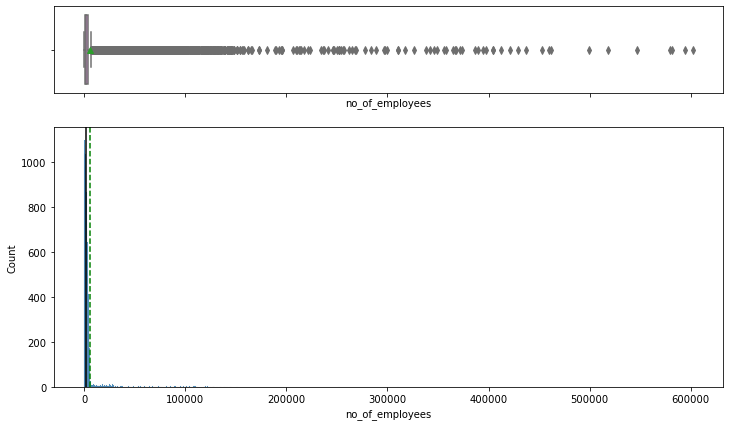

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(data, "no_of_employees")

Let's look at no_of_employees without outliers.

<AxesSubplot:xlabel='no_of_employees'>

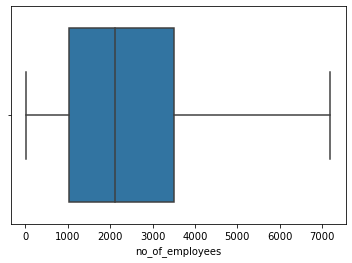

<IPython.core.display.Javascript object>

In [44]:
sns.boxplot(data=data, x="no_of_employees", showfliers=False)

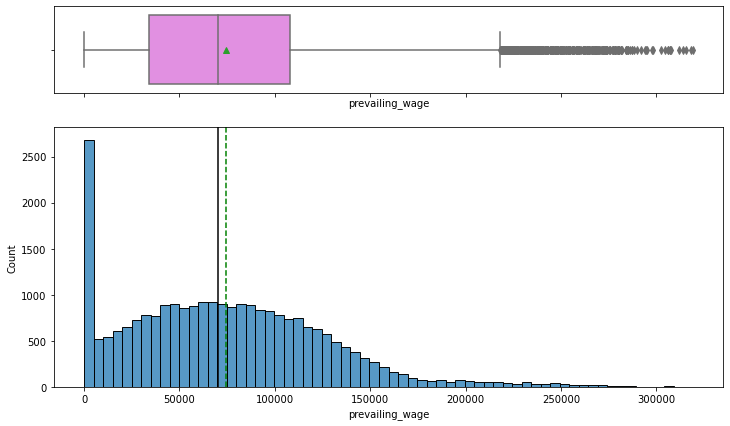

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(data, "prevailing_wage")

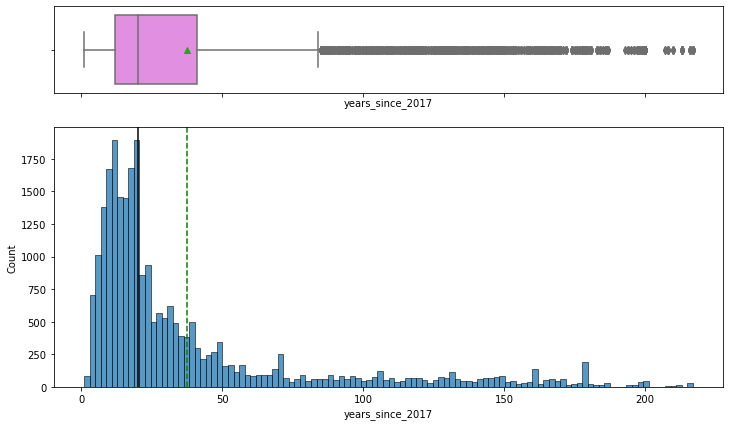

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(data, "years_since_2017")

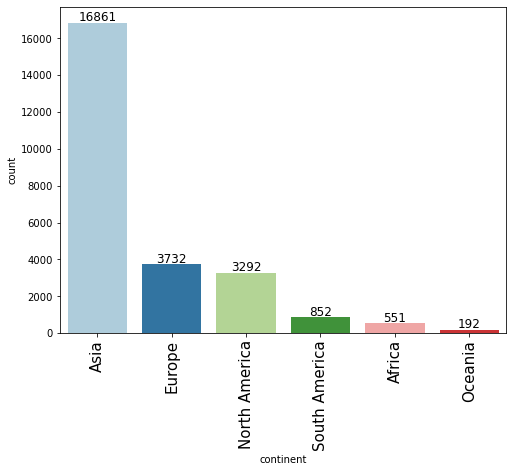

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(data, "continent")

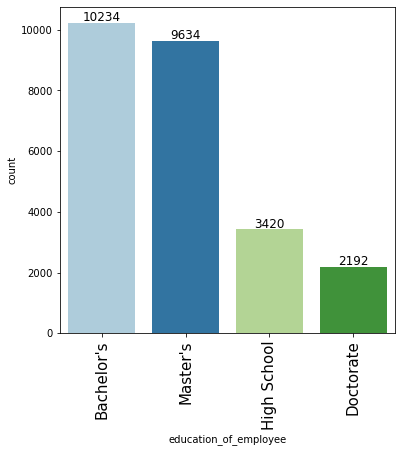

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "education_of_employee")

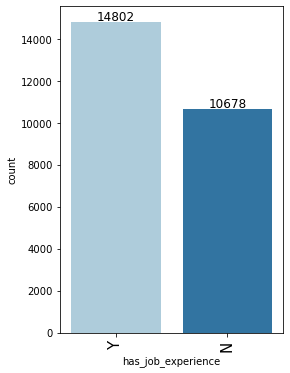

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(data, "has_job_experience")

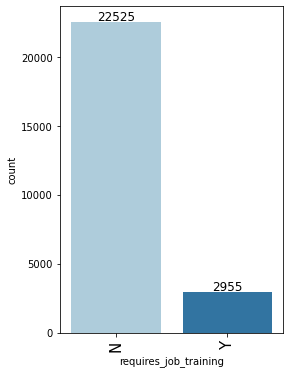

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(data, "requires_job_training")

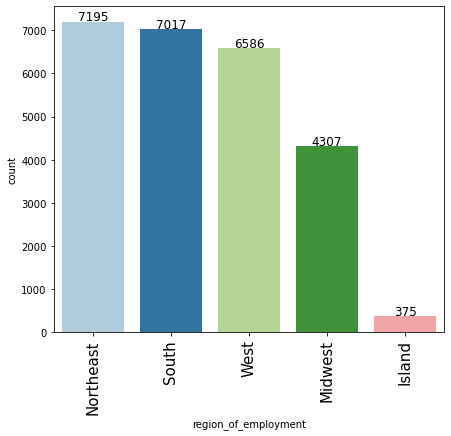

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(data, "region_of_employment")

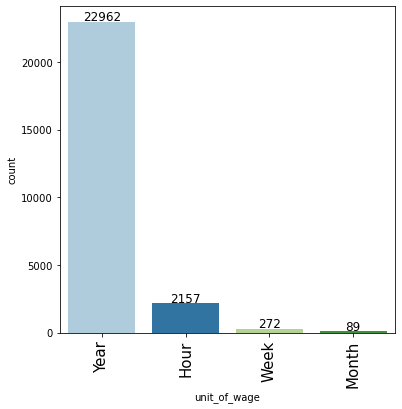

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data, "unit_of_wage")

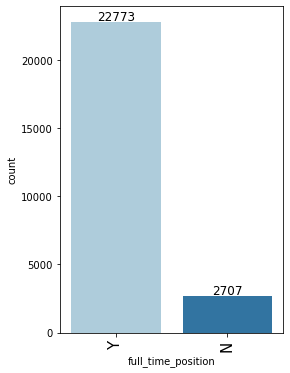

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data, "full_time_position")

##### Final Preprocessing

Now that we confirmed our data looks good through another round of EDA, let's one-hot encode the categorical variables so that we can start modeling!

In [54]:
data = pd.get_dummies(
    data,
    columns=[
        "continent",
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "region_of_employment",
        "unit_of_wage",
        "full_time_position",
    ],
    drop_first=True,
)
data.head()

,no_of_employees,prevailing_wage,case_status,years_since_2017,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513.00000,592.20290,0,10,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412.00000,83425.65000,1,15,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444.00000,122996.86000,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98.00000,83434.03000,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082.00000,149907.39000,1,12,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

We will now split the data into X and y sets.

In [55]:
X = data.drop("case_status", axis=1)
y = data.pop("case_status")

<IPython.core.display.Javascript object>

And, let's split the data set into train and test sets.

To prevent a significant imbalance in distribution of target classes, we will use stratified sampling to ensure relative class frequencies are generally preserved between train and test sets.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

Now let's start modeling!

## Building bagging and boosting models

Let's start by creating some functions to calculate how well our models perform.

In [57]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [58]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

Let's also take a step back and determine which metrics we value the most. 

* The false positive problem: A false positive means we provide certification to someone that doesn't deserve it. This is not good because we could be providing valuable resources to someone that doesn't actually deserve them.
* The false negative problem: A false negative means we deny certification to someone that actually deserves it. This is not good because we could be removing an opportunity from that deserves it and we miss out on quality work from this person.


The problem statement is that we want a model to process applications because there is a high volume of applications and it is tedious manual work. So false positives and false negatives hold equal importance. We will focus on F1 score to determine strength of a model because F1 score will hold both false negatives and false positives with high and equal importance.

#### Bagging Classifier (Default)

We'll start with a bagging classifier model with default parameters.

In [59]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator_default = BaggingClassifier(random_state=1)
bagging_estimator_default.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

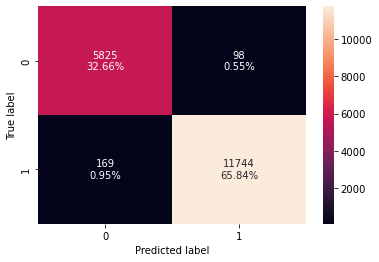

<IPython.core.display.Javascript object>

In [60]:
confusion_matrix_statsmodels(bagging_estimator_default, X_train, y_train)

In [61]:
model_performance_classification_statsmodels(
    bagging_estimator_default, X_train, y_train
)

,Accuracy,Recall,Precision,F1
0,0.98503,0.98581,0.99172,0.98876


<IPython.core.display.Javascript object>

The default bagging classifier model is strong in all metrics in the train data, but is it also strong in the test data?

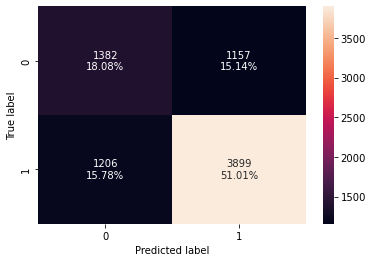

<IPython.core.display.Javascript object>

In [62]:
confusion_matrix_statsmodels(bagging_estimator_default, X_test, y_test)

In [63]:
model_performance_classification_statsmodels(bagging_estimator_default, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.69087,0.76376,0.77116,0.76744


<IPython.core.display.Javascript object>

There are over 20 percentage points of difference between the train and test set with this model. The model clearly overfits, so we should tune this model if we want to use it.

#### Random Forest Classifier (Default)

We will make a random forest model with default parameters.

In [64]:
rf_estimator_default = RandomForestClassifier(random_state=1)
rf_estimator_default.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

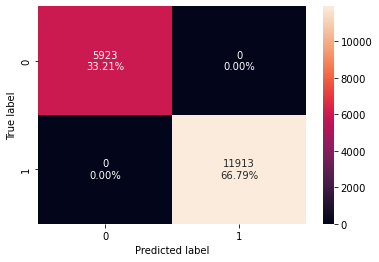

<IPython.core.display.Javascript object>

In [65]:
confusion_matrix_statsmodels(rf_estimator_default, X_train, y_train)

In [66]:
model_performance_classification_statsmodels(rf_estimator_default, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

It's pretty clear that there is strong overfitting given that every metric outputs 1. Let's see how this is on the test data to get a glimpse of how much overfitting occurs.

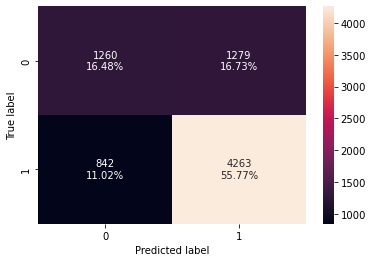

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_statsmodels(rf_estimator_default, X_test, y_test)

In [68]:
model_performance_classification_statsmodels(rf_estimator_default, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.72253,0.83506,0.76922,0.80079


<IPython.core.display.Javascript object>

Again, about 20 percentage points of difference between the train and test sets.

Let's also view the feature importances from this model.

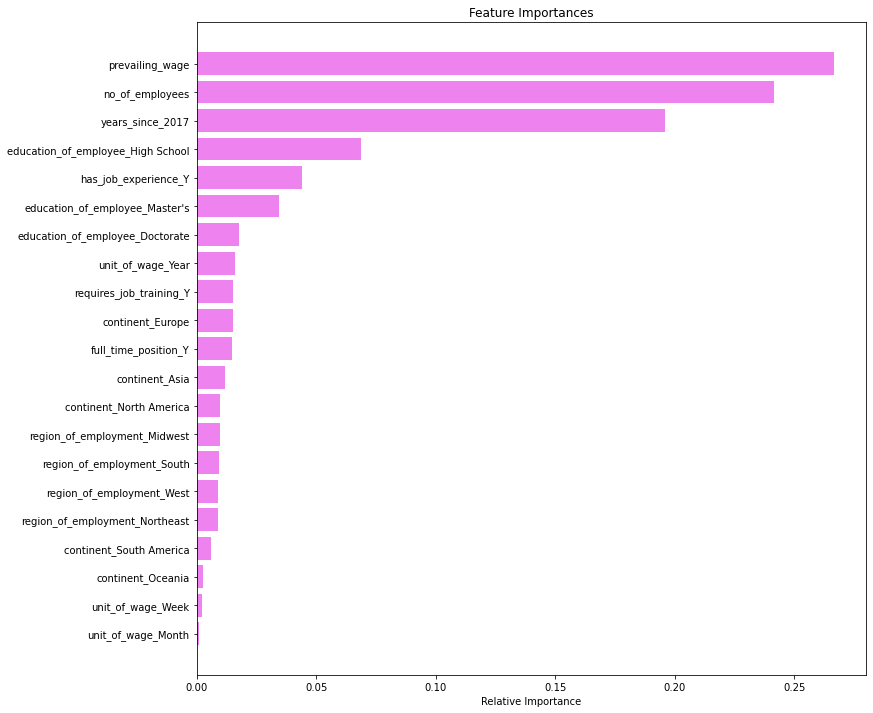

<IPython.core.display.Javascript object>

In [69]:
importances = rf_estimator_default.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

prevailing_wage has the highest feature importance. This is good reassurance for keeping this variable. no_of_employees and years_since_2017 is also having strong importance.

#### AdaBoost Classifier (Default)

We will make an AdaBoost model with default parameters.

In [70]:
abc_default = AdaBoostClassifier(random_state=1)
abc_default.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

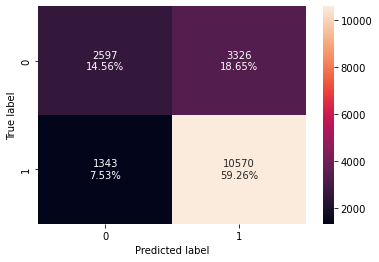

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_statsmodels(abc_default, X_train, y_train)

In [72]:
model_performance_classification_statsmodels(abc_default, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.73823,0.88727,0.76065,0.81909


<IPython.core.display.Javascript object>

No strong signs of overfitting, but let's see how the test data is.

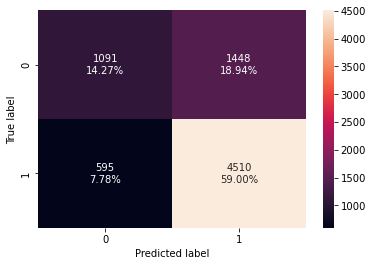

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_statsmodels(abc_default, X_test, y_test)

In [74]:
model_performance_classification_statsmodels(abc_default, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.73273,0.88345,0.75697,0.81533


<IPython.core.display.Javascript object>

AdaBoost performs pretty consistently between the train and test data. Both have generally high recall and a good F1 score of 82%, but precision is at about 76%. We will keep this in mind as the strongest default model so far.

Let's also view the feature importances of this model.

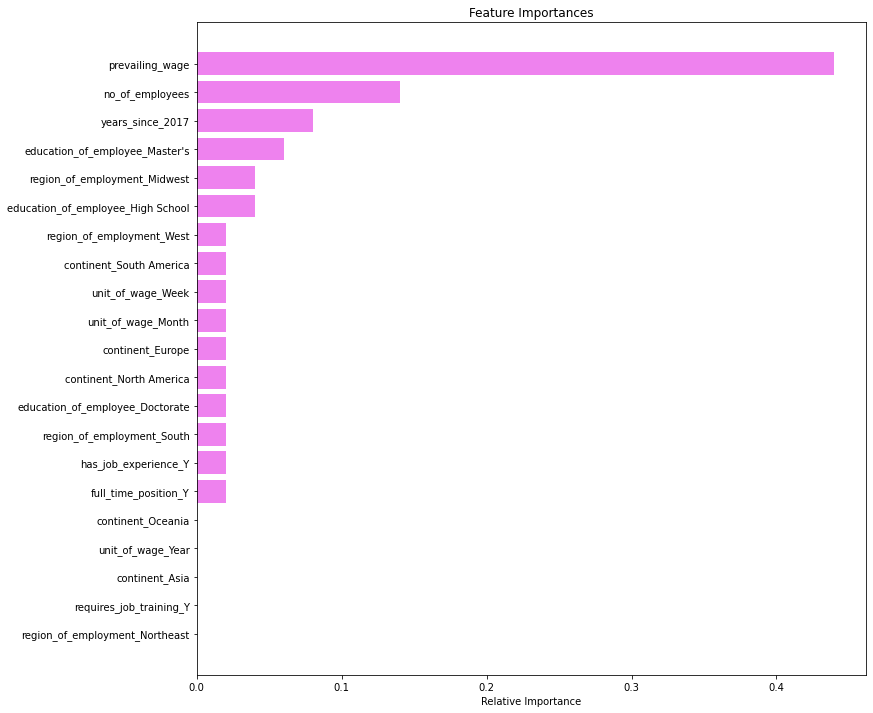

<IPython.core.display.Javascript object>

In [75]:
importances = abc_default.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This model holds prevailing_wage to a much stronger relative importance.

#### Gradient Boosting Classifier (Default)

We will make a Gradient Boosting model with default parameters.

In [76]:
gbc_default = GradientBoostingClassifier(random_state=1)
gbc_default.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

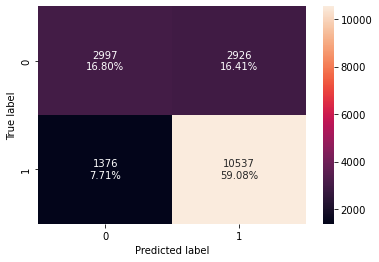

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_statsmodels(gbc_default, X_train, y_train)

In [78]:
model_performance_classification_statsmodels(gbc_default, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.75880,0.88450,0.78266,0.83047


<IPython.core.display.Javascript object>

No strong signs of overfitting, but let's see how this performs on the test data.

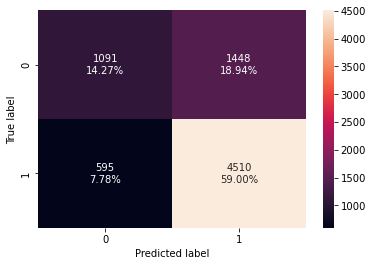

<IPython.core.display.Javascript object>

In [79]:
confusion_matrix_statsmodels(abc_default, X_test, y_test)

In [80]:
model_performance_classification_statsmodels(gbc_default, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.74411,0.87620,0.77161,0.82058


<IPython.core.display.Javascript object>

Default Gradient boosting performs consistently with both the train and the test data. High F1 score of 82% and higher precision compared to the AdaBoost default model.

Let's view the feature importances of this model.

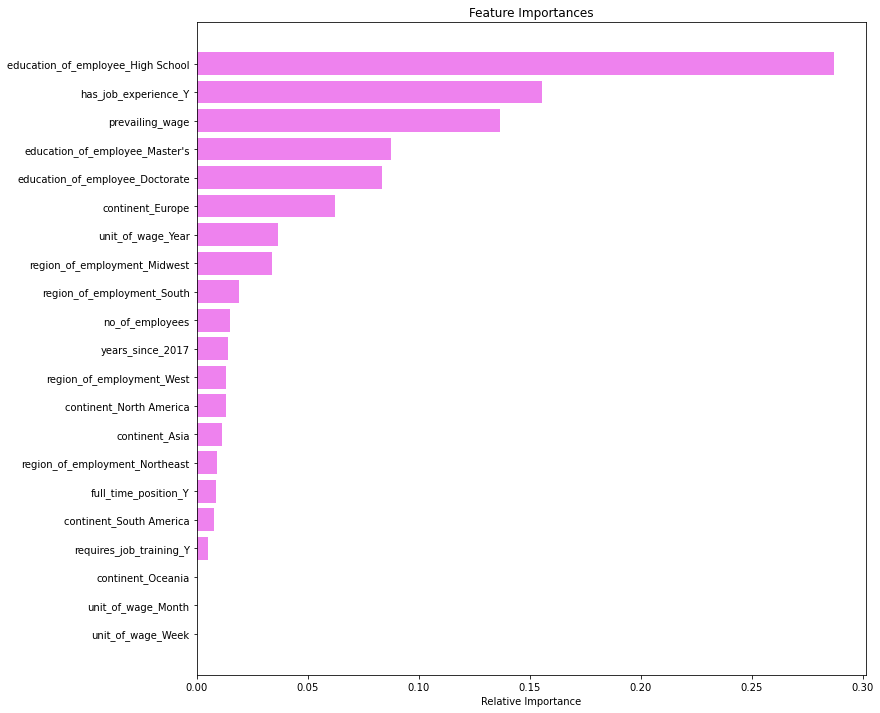

<IPython.core.display.Javascript object>

In [81]:
importances = gbc_default.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This model holds high school education to the highest importance. Job experience is slightly higher than prevailing_wage.

#### XGBoost Classifier (Default)

We will make an XGBoost model with default parameters. We will evaluate with logloss.

In [82]:
xgb_default = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_default.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

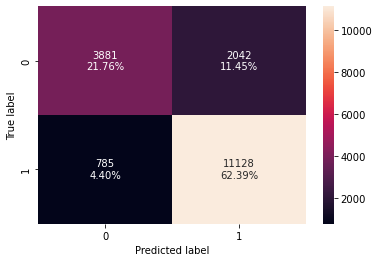

<IPython.core.display.Javascript object>

In [83]:
confusion_matrix_statsmodels(xgb_default, X_train, y_train)

In [84]:
model_performance_classification_statsmodels(xgb_default, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.84150,0.93411,0.84495,0.88729


<IPython.core.display.Javascript object>

XGBoost by default operates very strongly with the train data. Let's see how it is with the test data.

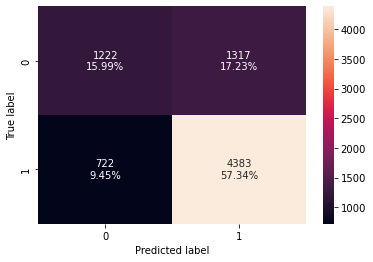

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_statsmodels(xgb_default, X_test, y_test)

In [86]:
model_performance_classification_statsmodels(xgb_default, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.73325,0.85857,0.76895,0.81129


<IPython.core.display.Javascript object>

XGBoost seemed to have had some level of overfitting on the train data.

Let's view the feature importances of this model.

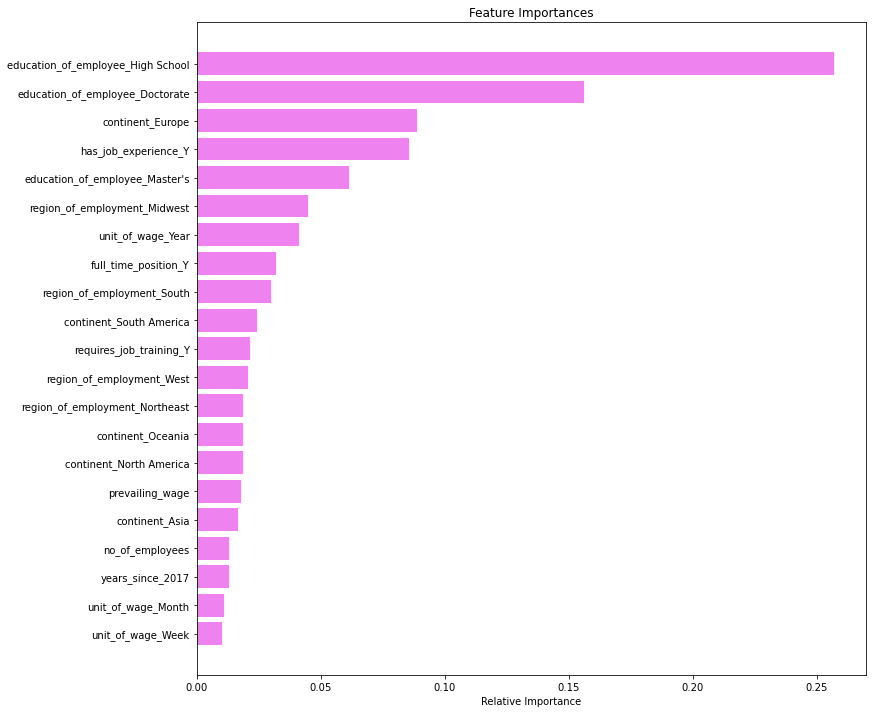

<IPython.core.display.Javascript object>

In [87]:
importances = xgb_default.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Interestingly, XGBoost holds prevailing_wage to a much lower importance. Education (both high school and doctorate) hold high importance.

Let's make a function to make it easy to compare performance of multiple models at once.

In [88]:
def model_comparison(models, modelnames, X_train, X_test, y_train, y_test):
    # define empty lists for test and train results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train = []
    f1_test = []

    # looping through all the models to get the accuracy, precall and precision scores
    for model in models:

        # Predicting on train and tests
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        # Accuracy of the model
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # Recall of the model
        train_recall = metrics.recall_score(y_train, pred_train)
        test_recall = metrics.recall_score(y_test, pred_test)

        # Precision of the model
        train_precision = metrics.precision_score(y_train, pred_train)
        test_precision = metrics.precision_score(y_test, pred_test)

        # F1 Score of the model
        train_f1 = metrics.f1_score(y_train, pred_train)
        test_f1 = metrics.f1_score(y_test, pred_test)

        # Append all the metrics to the empty lists for train and test results
        acc_train.append(np.round(train_acc, 2))
        acc_test.append(np.round(test_acc, 2))
        recall_train.append(np.round(train_recall, 2))
        recall_test.append(np.round(test_recall, 2))
        precision_train.append(np.round(train_precision, 2))
        precision_test.append(np.round(test_precision, 2))
        f1_train.append(np.round(train_f1, 2))
        f1_test.append(np.round(test_f1, 2))

    comparison_frame = pd.DataFrame(
        {
            "Model": modelnames,
            "Train_Accuracy": acc_train,
            "Test_Accuracy": acc_test,
            "Train_Recall": recall_train,
            "Test_Recall": recall_test,
            "Train_Precision": precision_train,
            "Test_Precision": precision_test,
            "Train_F1": f1_train,
            "Test_F1": f1_test,
        }
    )

    return comparison_frame

<IPython.core.display.Javascript object>

In [89]:
models = [
    bagging_estimator_default,
    rf_estimator_default,
    abc_default,
    gbc_default,
    xgb_default,
]
modelnames = [
    "Bagging Classifier with Default Parameters",
    "Random Forest with Default Parameters",
    "Adaboost with Default Parameters",
    "Gradient Boosting with Default Parameters",
    "XGBoost with Default Parameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Classifier with Default Parameters,0.99000,0.69000,0.99000,0.76000,0.99000,0.77000,0.99000,0.77000
1,Random Forest with Default Parameters,1.00000,0.72000,1.00000,0.84000,1.00000,0.77000,1.00000,0.80000
2,Adaboost with Default Parameters,0.74000,0.73000,0.89000,0.88000,0.76000,0.76000,0.82000,0.82000
3,Gradient Boosting with Default Parameters,0.76000,0.74000,0.88000,0.88000,0.78000,0.77000,0.83000,0.82000
4,XGBoost with Default Parameters,0.84000,0.73000,0.93000,0.86000,0.84000,0.77000,0.89000,0.81000


<IPython.core.display.Javascript object>

##### Observations:
* Bagging Classifier and Random Forest has clear overfitting with the train set because the metrics have high discrepancy compared to the test set.
* Adaboost and Gradient Boosting has the highest test F1 scores with comparable recall and precision scores. 

##  Will tuning the hyperparameters improve the model performance?

We will tune the hyperparameters for each type of model with the goal of stronger performance.

#### Bagging Classifier (Tuning)

We'll tune a couple hyperparameters for the Bagging Classifier. At least for now, we won't specify a base_estimator so all runs will use the decision tree model by default.

In [90]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
# We will keep default behavior for bootstrap, so samples will be drawn with replacement.
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
# We will use F1 score because we determine we value recall and precision equally
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Now let's measure how well this model performs.

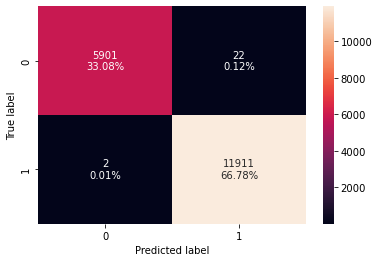

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_statsmodels(bagging_estimator_tuned, X_train, y_train)

In [92]:
model_performance_classification_statsmodels(bagging_estimator_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.99865,0.99983,0.99816,0.99899


<IPython.core.display.Javascript object>

There definitely appears to be strong overfitting. Let's see how this is with the test set.

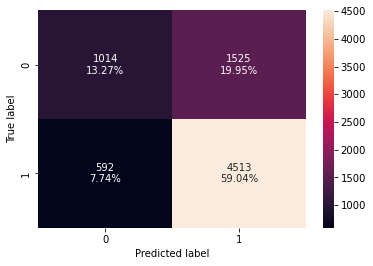

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_statsmodels(bagging_estimator_tuned, X_test, y_test)

In [94]:
model_performance_classification_statsmodels(bagging_estimator_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.72305,0.88404,0.74743,0.81002


<IPython.core.display.Javascript object>

The test set has an F1 score of 81% which is good. However, the precision is very low - the discrepancy between precision and recall is almost 15 percentage points.

We will not view the feature importances of the model because the bagging classifier does not contain a feature importance attribute.

Let's compare the default bagging model to the tuned bagging model.

In [95]:
models = [bagging_estimator_default, bagging_estimator_tuned]
modelnames = [
    "Bagging Classifier with Default Parameters",
    "Bagging Classifier with Hyperparameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Classifier with Default Parameters,0.99000,0.69000,0.99000,0.76000,0.99000,0.77000,0.99000,0.77000
1,Bagging Classifier with Hyperparameters,1.00000,0.72000,1.00000,0.88000,1.00000,0.75000,1.00000,0.81000


<IPython.core.display.Javascript object>

The tuned bagging classifier performs more reliably than the default bagging classifier, but we still have an overfitting model on the train set. Let's explore hypertuning other models.

#### Random Forest (Tuning)

In the data observation section, we observed that the data set contains about 67% certified cases and 33% denied cases. We'll use the class_weight parameter with this breakup to balance the model.

In [96]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
# We will use a class_weight parameter to balance the model
parameters = {
    "class_weight": [{0: 0.33, 1: 0.67}],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
# We will use F1 score because we determine we value recall and precision equally
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67},
                       max_features=0.5000000000000001, max_samples=0.5,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

Now let's measure how well this model performs.

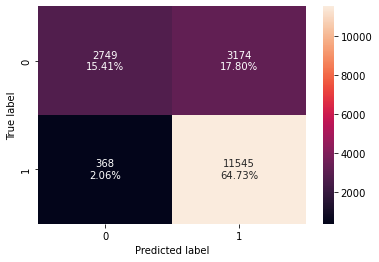

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_statsmodels(rf_estimator_tuned, X_train, y_train)

In [98]:
model_performance_classification_statsmodels(rf_estimator_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.80141,0.96911,0.78436,0.86700


<IPython.core.display.Javascript object>

On the train set, this model has very strong recall but the precision is almost 20 percentage points lower. Let's see how it is on the test set.

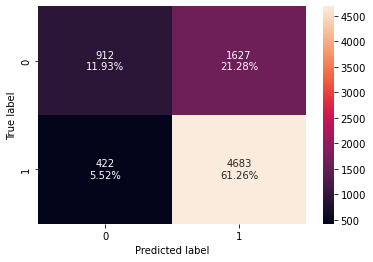

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_statsmodels(rf_estimator_tuned, X_test, y_test)

In [100]:
model_performance_classification_statsmodels(rf_estimator_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.73195,0.91734,0.74216,0.82050


<IPython.core.display.Javascript object>

On the test, set the model still has strong recall but there is also a high discrepancy between the recall and precision.

Let's review the feature importances of this model.

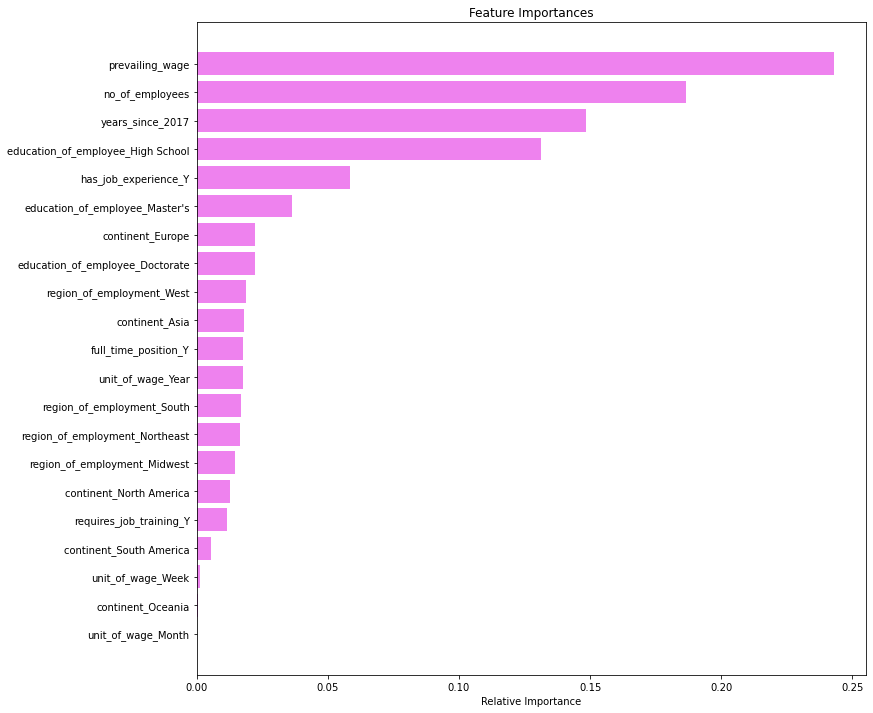

<IPython.core.display.Javascript object>

In [101]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The feature importances in the tuned random forest model generally match the default random forest model.

Let's compare the default random forest model to the tuned random forest model.

In [102]:
models = [rf_estimator_default, rf_estimator_tuned]
modelnames = [
    "Random Forest with Default Parameters",
    "Random Forest with Hyperparameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Random Forest with Default Parameters,1.00000,0.72000,1.00000,0.84000,1.00000,0.77000,1.00000,0.80000
1,Random Forest with Hyperparameters,0.80000,0.73000,0.97000,0.92000,0.78000,0.74000,0.87000,0.82000


<IPython.core.display.Javascript object>

The tuned random forest model performs more consistently between the test set and the train set. 

Now let's explore tuning the boosting models.

#### AdaBoost Classifier (Tuning)

In our hyperparameter turning with Adaboost, we will run the Decision Tree model with varying max depths to observe if that has a difference.
We will also explore the learning_rate parameter to see if shrinking the contribution of each classifier by varying levels can help find the best model configuration.

In [103]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 60, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
# We will use F1 score because we determine we value recall and precision equally
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

<IPython.core.display.Javascript object>

Now let's measure how well this model performs.

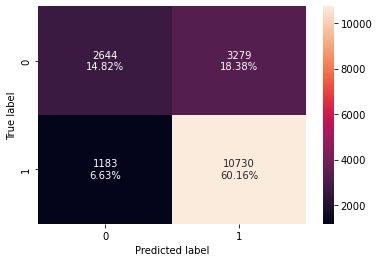

<IPython.core.display.Javascript object>

In [104]:
confusion_matrix_statsmodels(abc_tuned, X_train, y_train)

In [105]:
model_performance_classification_statsmodels(abc_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.74983,0.90070,0.76594,0.82787


<IPython.core.display.Javascript object>

We have good recall, but a fairly high descripency from the precision score. Let's see what the test data looks like.

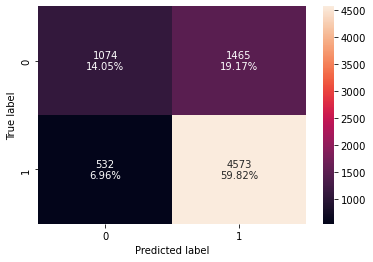

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_statsmodels(abc_tuned, X_test, y_test)

In [107]:
model_performance_classification_statsmodels(abc_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.73875,0.89579,0.75737,0.82078


<IPython.core.display.Javascript object>

Let's see what the feature importances look like for this model.

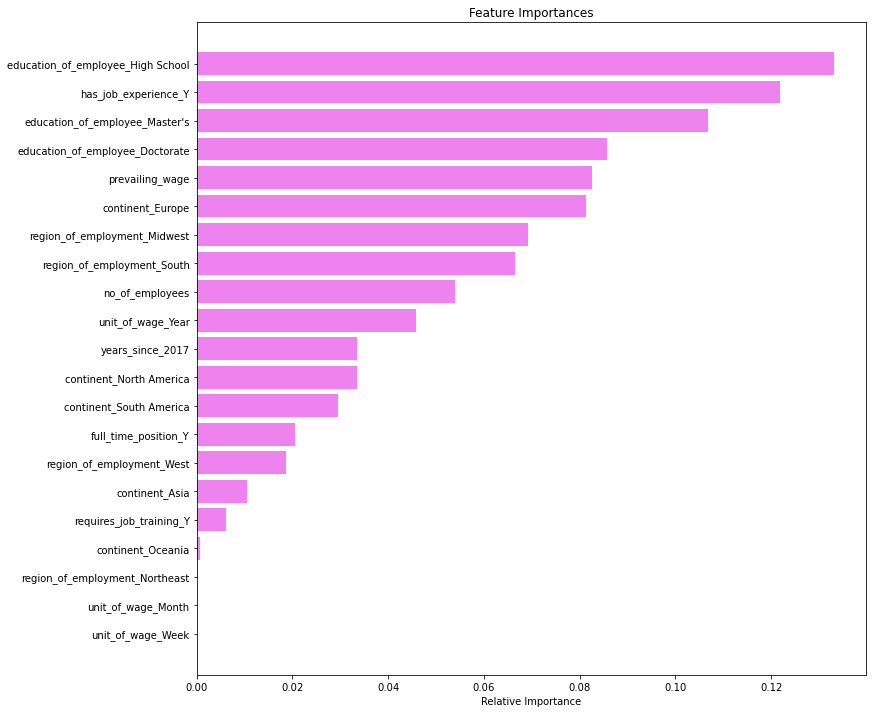

<IPython.core.display.Javascript object>

In [108]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education and job experiences have the most importance, followed by prevailing_wage.

In [109]:
models = [abc_default, abc_tuned]
modelnames = [
    "AdaBoost with Default Parameters",
    "AdaBoost with Hyperparameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,AdaBoost with Default Parameters,0.74000,0.73000,0.89000,0.88000,0.76000,0.76000,0.82000,0.82000
1,AdaBoost with Hyperparameters,0.75000,0.74000,0.90000,0.90000,0.77000,0.76000,0.83000,0.82000


<IPython.core.display.Javascript object>

In the grand scheme of things, there actually wasn't that much improvement with the AdaBoost model after hypertuning it.

Now let's tune the Gradient Boosting model.

#### Gradient Boosting (Tuning)

By default, a DummyEstimator is used for computing initial predictions in Gradient boosting. Before going into thorough tuning, let's explore a Gradient Boosting model that uses AdaBoost as the initial model.

In [110]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [111]:
models = [gbc_default, gbc_init]
modelnames = [
    "Gradient Boosting with Default Parameters",
    "Gradient Boosting with AdaBoost as Initial Estimator",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Gradient Boosting with Default Parameters,0.76000,0.74000,0.88000,0.88000,0.78000,0.77000,0.83000,0.82000
1,Gradient Boosting with AdaBoost as Initial Est...,0.76000,0.75000,0.88000,0.87000,0.78000,0.77000,0.83000,0.82000


<IPython.core.display.Javascript object>

There actually wasn't a major difference between the default parameters and AdaBoost initial estimator. Regardless, we will still tune the Gradient Boosting model.

In [112]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

Now let's see how well this model performs.

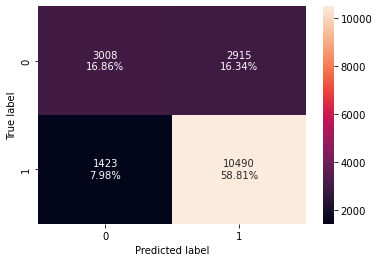

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_statsmodels(gbc_tuned, X_train, y_train)

In [114]:
model_performance_classification_statsmodels(gbc_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.75678,0.88055,0.78254,0.82866


<IPython.core.display.Javascript object>

Good recall, and also high precision on the train set. Only 10 percentage points of difference between the recall and precision values. Let's see how this is with the test set.

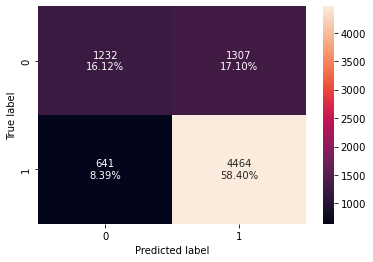

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_statsmodels(gbc_tuned, X_test, y_test)

In [116]:
model_performance_classification_statsmodels(gbc_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.74516,0.87444,0.77352,0.82089


<IPython.core.display.Javascript object>

Let's review the feature importances of this model.

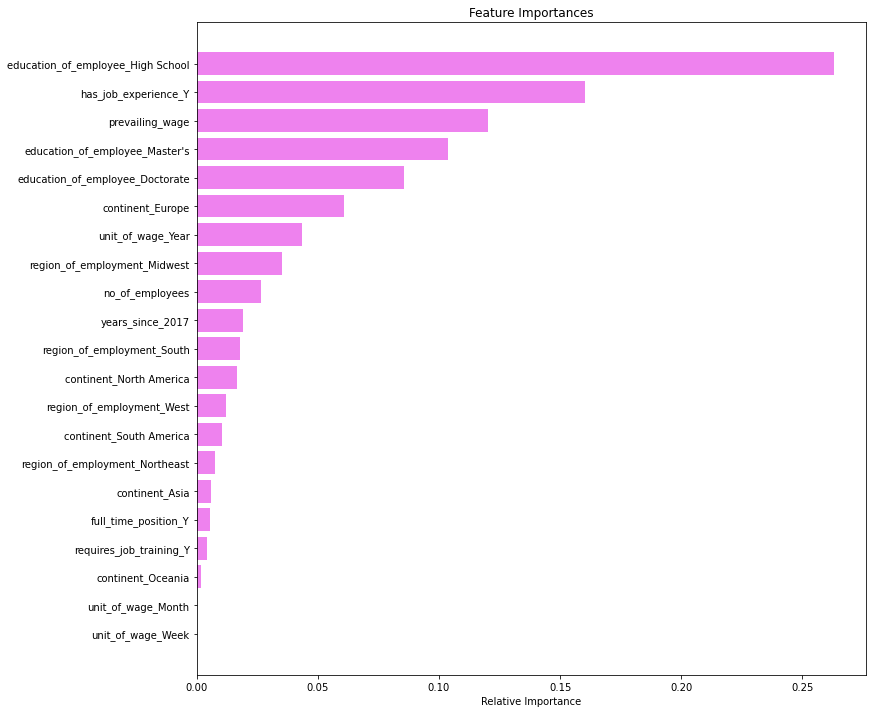

<IPython.core.display.Javascript object>

In [117]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [118]:
models = [gbc_default, gbc_init, gbc_tuned]
modelnames = [
    "Gradient Boosting with Default Parameters",
    "Gradient Boosting with AdaBoost as Initial Estimator",
    "Gradient Boosting with Hyperparameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Gradient Boosting with Default Parameters,0.76000,0.74000,0.88000,0.88000,0.78000,0.77000,0.83000,0.82000
1,Gradient Boosting with AdaBoost as Initial Est...,0.76000,0.75000,0.88000,0.87000,0.78000,0.77000,0.83000,0.82000
2,Gradient Boosting with Hyperparameters,0.76000,0.75000,0.88000,0.87000,0.78000,0.77000,0.83000,0.82000


<IPython.core.display.Javascript object>

Despite doing hypertuning, all Gradient boosting models actually performed equally in all metrics.

Now let's tune the XGBoost model.

#### XGBoost (Tuning)

Hypertuning XGBoost can be performance intensive. We will explore creative ways to make this tuning more feasible.

First, we'll review which parameters are worth tuning.
* We'll use n_estimators but keep relatively low numbers
* We'll use subsample because it could potentially prevent overfitting.
* We won't use learning_rate because we already have subsample to check for overfitting.
* We'll use gamma to explore how the model behavior can perform differently based on the minimum loss reduction required to make further partitions.
* We'll only keep one colsample parameter to account for column-wise subsampling. We'll keep the simplest column sampling - by tree.

Next, each parameter will only have max 3 values to loop through so that we save on time.

In [120]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 60, 20),
    "subsample": [0.5, 0.7, 0.9],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.75, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

Now let's see how this tuned model performs.

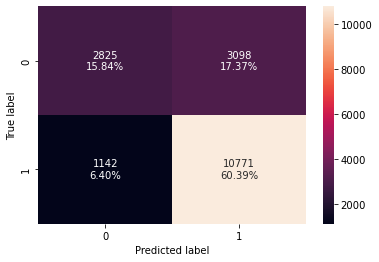

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_statsmodels(xgb_tuned, X_train, y_train)

In [122]:
model_performance_classification_statsmodels(xgb_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.76228,0.90414,0.77662,0.83554


<IPython.core.display.Javascript object>

We have good recall with a precision value about 12 percentage points lower. Let's see how the test data performs.

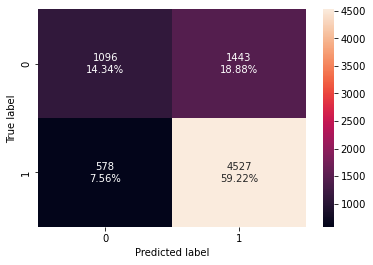

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_statsmodels(xgb_tuned, X_test, y_test)

In [124]:
model_performance_classification_statsmodels(xgb_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.73561,0.88678,0.75829,0.81752


<IPython.core.display.Javascript object>

Let's review the feature importances of this model.

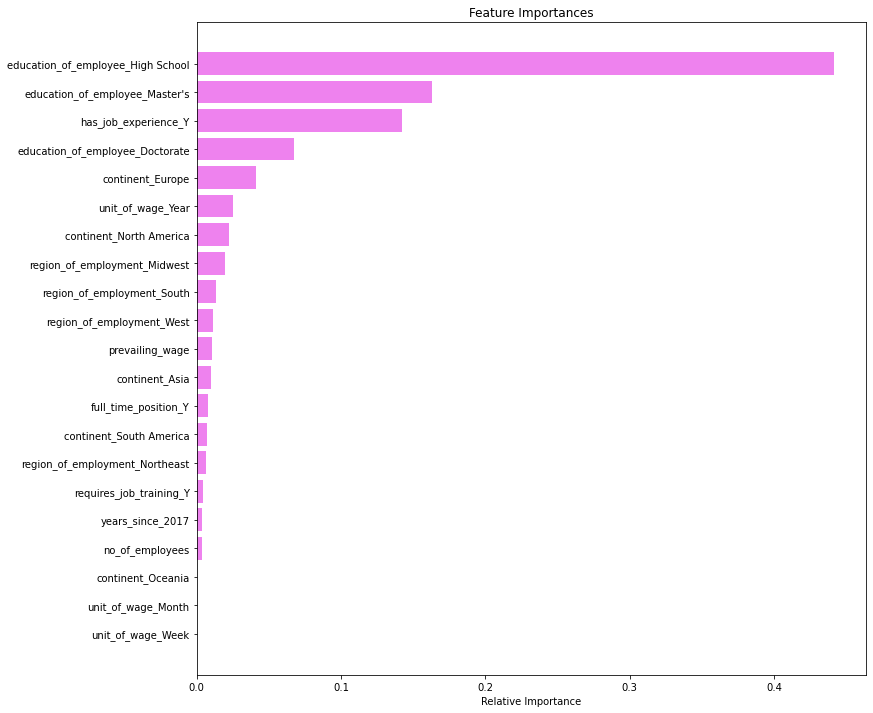

<IPython.core.display.Javascript object>

In [125]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education and job experience have the top feature importances.

In [126]:
models = [xgb_default, xgb_tuned]
modelnames = ["XGBoost with Default Parameters", "XGBoost with Hyperparameters"]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,XGBoost with Default Parameters,0.84000,0.73000,0.93000,0.86000,0.84000,0.77000,0.89000,0.81000
1,XGBoost with Hyperparameters,0.76000,0.74000,0.90000,0.89000,0.78000,0.76000,0.84000,0.82000


<IPython.core.display.Javascript object>

There actually wasn't too much of an improvement with hyperparameter tuning here.

## Model Performance Comparison and Conclusions

Let's review all of the models together now.

In [127]:
models = [
    bagging_estimator_default,
    bagging_estimator_tuned,
    rf_estimator_default,
    rf_estimator_tuned,
    abc_default,
    abc_tuned,
    gbc_default,
    gbc_init,
    gbc_tuned,
    xgb_default,
    xgb_tuned,
]
modelnames = [
    "Bagging Classifier with Default Parameters",
    "Bagging Classifier with Hyperparameters",
    "Random Forest with Default Parameters",
    "Random Forest with Hyperparameters",
    "AdaBoost with Default Parameters",
    "AdaBoost with Hyperparameters",
    "Gradient Boosting with Default Parameters",
    "Gradient Boosting with AdaBoost as Initial Estimator",
    "Gradient Boosting with Hyperparameters",
    "XGBoost with Default Parameters",
    "XGBoost with Hyperparameters",
]
model_comparison(models, modelnames, X_train, X_test, y_train, y_test)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Classifier with Default Parameters,0.99000,0.69000,0.99000,0.76000,0.99000,0.77000,0.99000,0.77000
1,Bagging Classifier with Hyperparameters,1.00000,0.72000,1.00000,0.88000,1.00000,0.75000,1.00000,0.81000
2,Random Forest with Default Parameters,1.00000,0.72000,1.00000,0.84000,1.00000,0.77000,1.00000,0.80000
3,Random Forest with Hyperparameters,0.80000,0.73000,0.97000,0.92000,0.78000,0.74000,0.87000,0.82000
4,AdaBoost with Default Parameters,0.74000,0.73000,0.89000,0.88000,0.76000,0.76000,0.82000,0.82000
5,AdaBoost with Hyperparameters,0.75000,0.74000,0.90000,0.90000,0.77000,0.76000,0.83000,0.82000
6,Gradient Boosting with Default Parameters,0.76000,0.74000,0.88000,0.88000,0.78000,0.77000,0.83000,0.82000
7,Gradient Boosting with AdaBoost as Initial Est...,0.76000,0.75000,0.88000,0.87000,0.78000,0.77000,0.83000,0.82000
8,Gradient Boosting with Hyperparameters,0.76000,0.75000,0.88000,0.87000,0.78000,0.77000,0.83000,0.82000
9,XGBoost with Default Parameters,0.84000,0.73000,0.93000,0.86000,0.84000,0.77000,0.89000,0.81000


<IPython.core.display.Javascript object>

#### Observations:
* Features that were commonly held to high importances in models were employee education, job experience, and prevailing wage.
* None of the models had a test precision score of above 77%. On the other hand, most of the models had test recall scores in the 80s and some even were as high as 92%.
* The bagging models were the most prone to overfitting the train set.
* The Bagging Classifier with default parameters had the lowest F1 score - this is probably because the bagging classifier is the simplest of the models
* Most models had test F1 scores in the low 80s. Given that all models are generally comparable based on F1 scores, we should review the other metrics to determine the best model.
* Gradient boosting with default parameters is the best model out of the 11 we measured here. We have a strong recall value of 88%, while also having a relatively high precision value of 77%. This model also has a relatively low difference between recall and precision values compared to the other models here.

## Actionable Insights and Recommendations

In an effort to provide more detailed insights and recommendations, I will repost the confusion matrices for train and test data, metric comparisons for train and test data, and feature importances.

In [128]:
model_comparison(
    [gbc_default],
    ["Gradient Boosting with Default Parameters"],
    X_train,
    X_test,
    y_train,
    y_test,
)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Gradient Boosting with Default Parameters,0.76000,0.74000,0.88000,0.88000,0.78000,0.77000,0.83000,0.82000


<IPython.core.display.Javascript object>

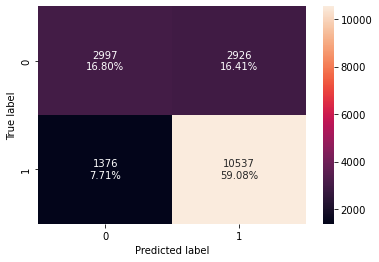

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_statsmodels(gbc_default, X_train, y_train)

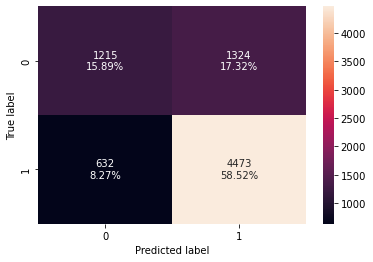

<IPython.core.display.Javascript object>

In [130]:
confusion_matrix_statsmodels(gbc_default, X_test, y_test)

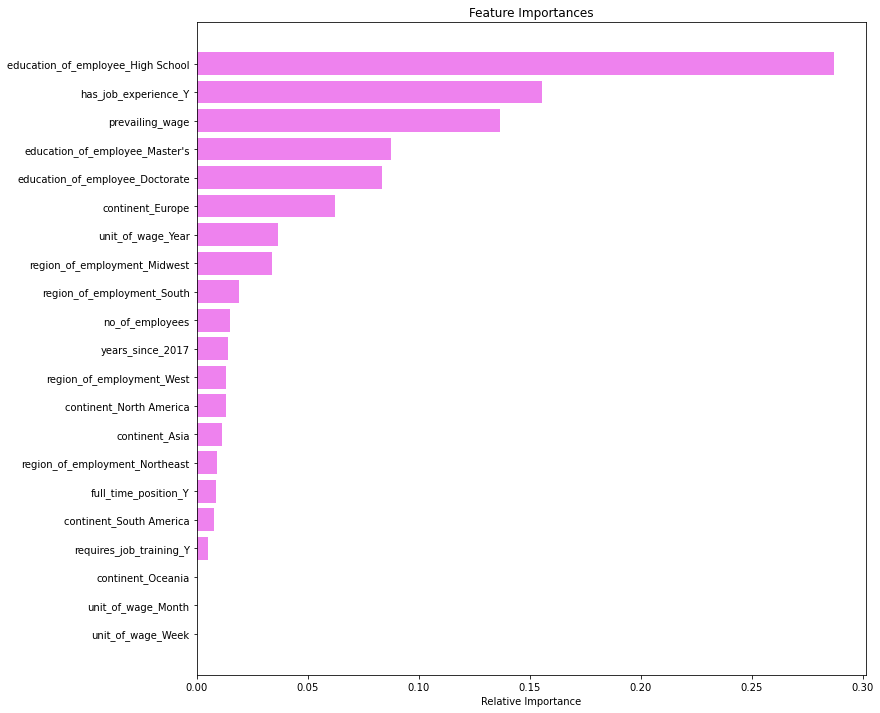

<IPython.core.display.Javascript object>

In [131]:
importances = gbc_default.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Insights and Recommendations:
* People with a higher level of education have higher likelihood of getting certified. The company can provide a disclaimer on their application website that education level increases chances of certification. This can decrease the number of high-school only applicantions - the high-schoolers will have motivation to continue higher education, and the company will have less volume of applications from high schoolers that will likely be denied so that they can focus on the rest of the volume.
* People with prior job experience are more likely to get certified. Similar to the education disclaimer, the company can add a disclaimer for prior job experience so that people with no job experience will be aware and wait to apply until they have experience.
* Prevailing wage is a strong factor in certification. Case reviewers can compare applicant wages to wages in the requested industry to shortlist those with higher prevailing wages.
* Applicants from Europe have a much higher likelihood of certification compared to other countries. If the company wants to have a diverse population, they may want to organize some sort of an affirmative action program to equalize the application acceptance across all countries.
* Job training requirements have minimal effect on certification, likely because companies will already provide training to all new employees. The company should not shortlist candidates based on job training requirements.